In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [123]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [124]:
e.lames.shape

(4, 31)

## Point-Line Distance--2-Dimensional

See http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html


In [125]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

[[ 0.2 -0.5  0.3]
 [ 0.3  1.1  0.9]]


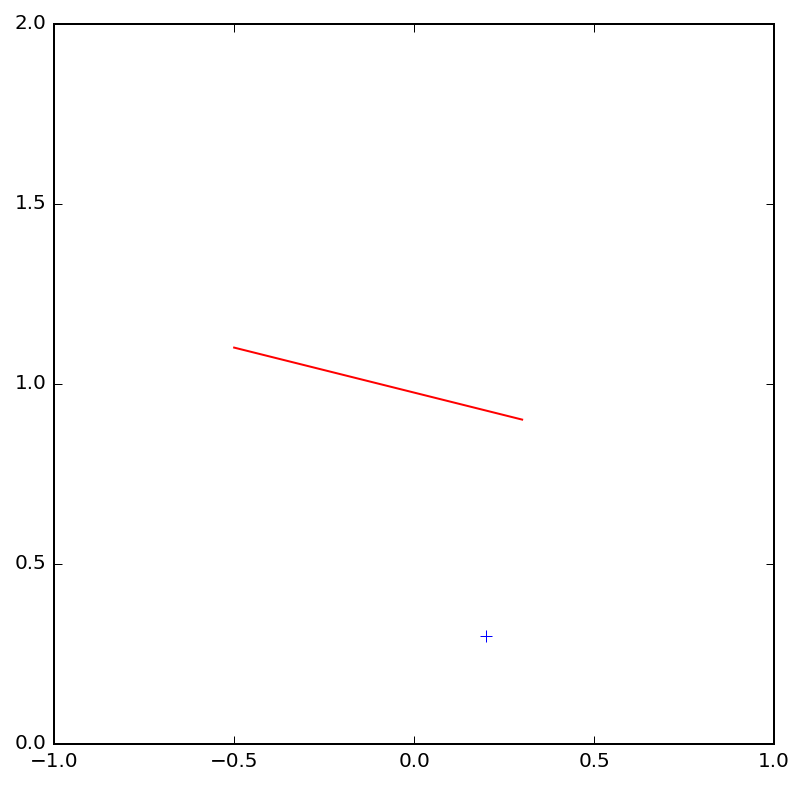

In [126]:
particles = np.array([[.2, .3], [-.5, 1.1], [.3, .9]]).T
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles)

projection du point sur la droite

[[ 0.2 -0.5  0.3]
 [ 1.5  0.8  0.9]]
[ 0.2  1.5]
[[-0.8 -0.5]
 [-0.9  0.3]]
[ 0.1 -0.8]
0.49 0.80622577483 0.607770199487
[ 0.28  0.9 ]


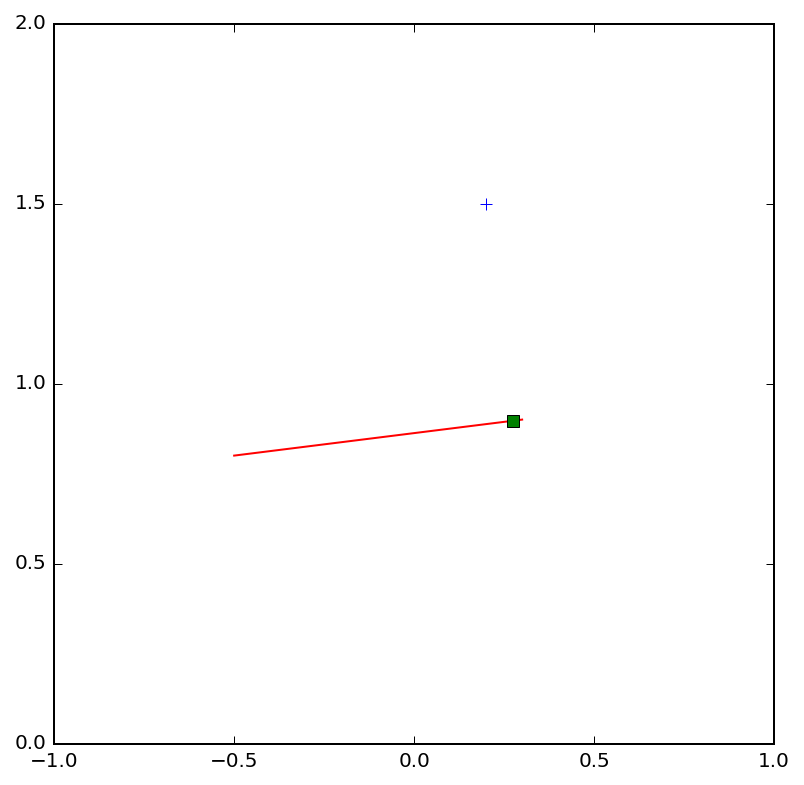

In [127]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
print(particles)
P = particles[:, 0].copy()
print(P)
print(np.dot(particles[:, 1:].T, np.array([[0, 1], [-1, 0]])))
perp = np.zeros_like(P)
perp[0] = particles[1, 2] - particles[1, 1]
perp[1] = -(particles[0, 2] - particles[0, 1])
print(perp)
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
print(d, np.sqrt(perp[0]**2 + perp[1]**2), d/np.sqrt(perp[0]**2 + perp[1]**2))
# normalizing
#perp /= np.sqrt((perp**2).sum())
#perp /= np.sqrt(perp[0]**2 + perp[1]**2)
P += d * perp / (perp[0]**2 + perp[1]**2)
fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

shorter form

[ 0.28  0.9 ]


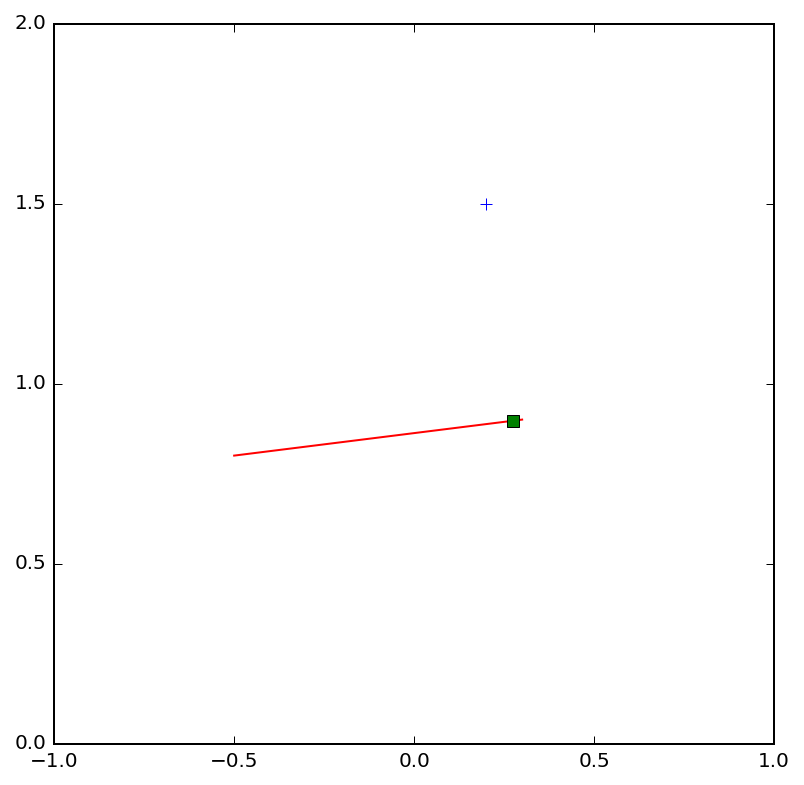

In [128]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

deducing the mirror image as twice this projection

[ 0.35  0.29]


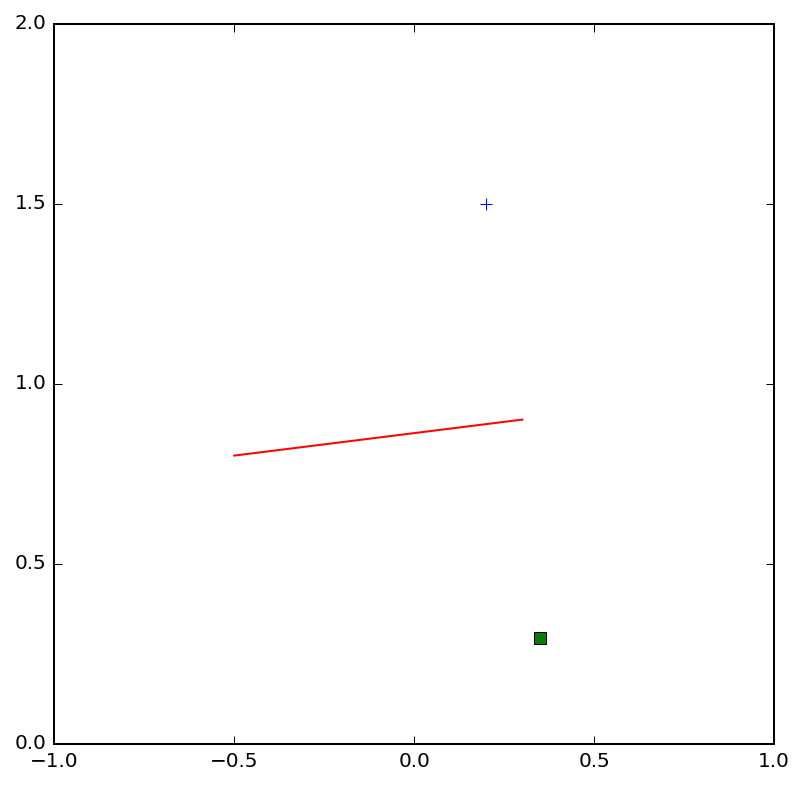

In [129]:
particles = np.array([[.2, 1.4], [-.5, 1.], [.4, 1.]]).T
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
perp = np.array([particles[1, 2] - particles[1, 1], -(particles[0, 2] - particles[0, 1])])
# distance to the line
d = perp[0]*(particles[0, 1] - particles[0, 0]) + perp[1]*(particles[1, 1] - particles[1, 0])
P =  particles[:, 0] + 2 *d * perp / (perp**2).sum()

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, 0], particles[1, 0], 'b+')
ax.plot(particles[0, 1:], particles[1, 1:], 'r')
ax.plot(P[0], P[1], 'gs')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(P)

a function

In [130]:
particles.T.tolist()

[[0.2, 1.5], [-0.5, 0.8], [0.3, 0.9]]

[[ 0.54  0.02  0.09  0.23  0.63  0.19  0.29  0.94  0.09  0.95]
 [ 0.02  0.56  0.11  0.67  0.51  0.73  0.43  0.24  0.51  0.86]]
[[-0.5  0.5]
 [ 0.5  1.5]]
[[-0.98 -0.44 -0.89 -0.33 -0.49 -0.27 -0.57 -0.76 -0.49 -0.14]
 [ 1.54  1.02  1.09  1.23  1.63  1.19  1.29  1.94  1.09  1.95]]


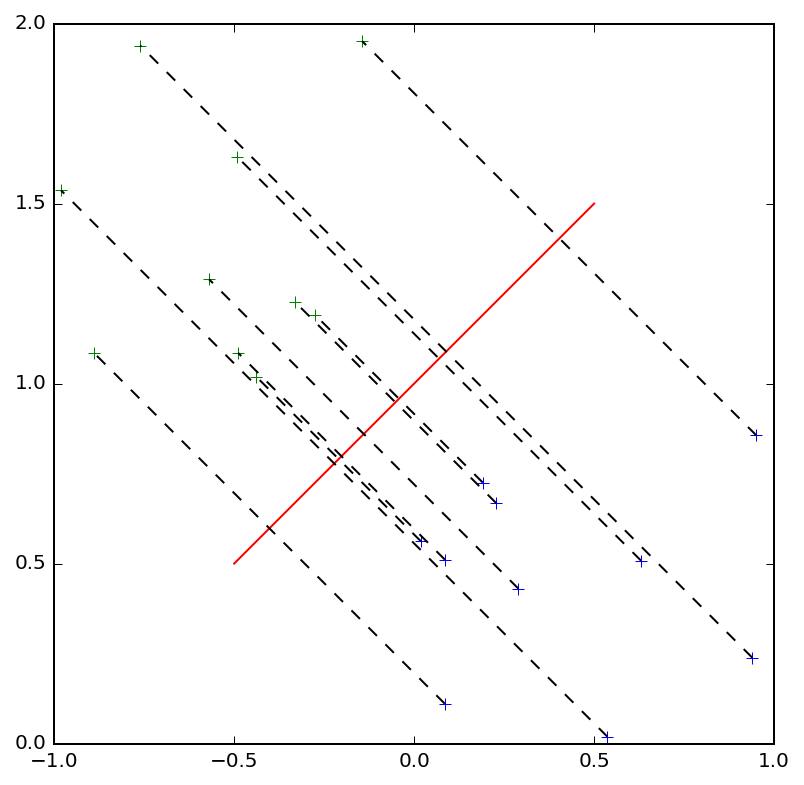

In [147]:
particles = np.array([[.2, 1.5], [-.5, .8], [.3, .9]]).T
particles = np.random.rand(2, 10)
print(particles)
segment = np.array([[-.5, .5], [.5, 1.5]]).T
print(segment)
def mirror(particles, segment):
    mirror = particles.copy()
    perp = np.array([segment[1][1] - segment[1][0], -(segment[0][1] - segment[0][0])])
    # distance to the line
    d = perp[0]*(segment[0][1] - particles[0, :]) + perp[1]*(segment[1, 1] - particles[1, :])
    mirror[:2, :] =  particles[:2, :] + 2. * d[np.newaxis, :] * perp[:, np.newaxis] / (perp**2).sum()
    return mirror

particles_mirror = mirror(particles, segment)

fig = plt.figure(figsize=(5, 5))
border = 0.0
ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
ax.plot(particles[0, :], particles[1, :], 'b+')
ax.plot(segment[0, :], segment[1, :], 'r')
ax.plot(particles_mirror[0, :], particles_mirror[1, :], 'g+')
ax.plot(np.vstack((particles[0, :], particles_mirror[0, :])), np.vstack((particles[1, :], particles_mirror[1, :])), 'k--')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 2])
print(particles_mirror)

## on applique maintenant à la structure

la structure est représentée par une liste de segments sur lesquels on a tiré des points 

[[-1.45 -3.53 -3.85  1.45  3.53  3.85]
 [ 3.11  1.36 -1.46  3.11  1.36 -1.46]
 [ 3.4   4.28  4.92 -0.26 -1.13 -1.78]]


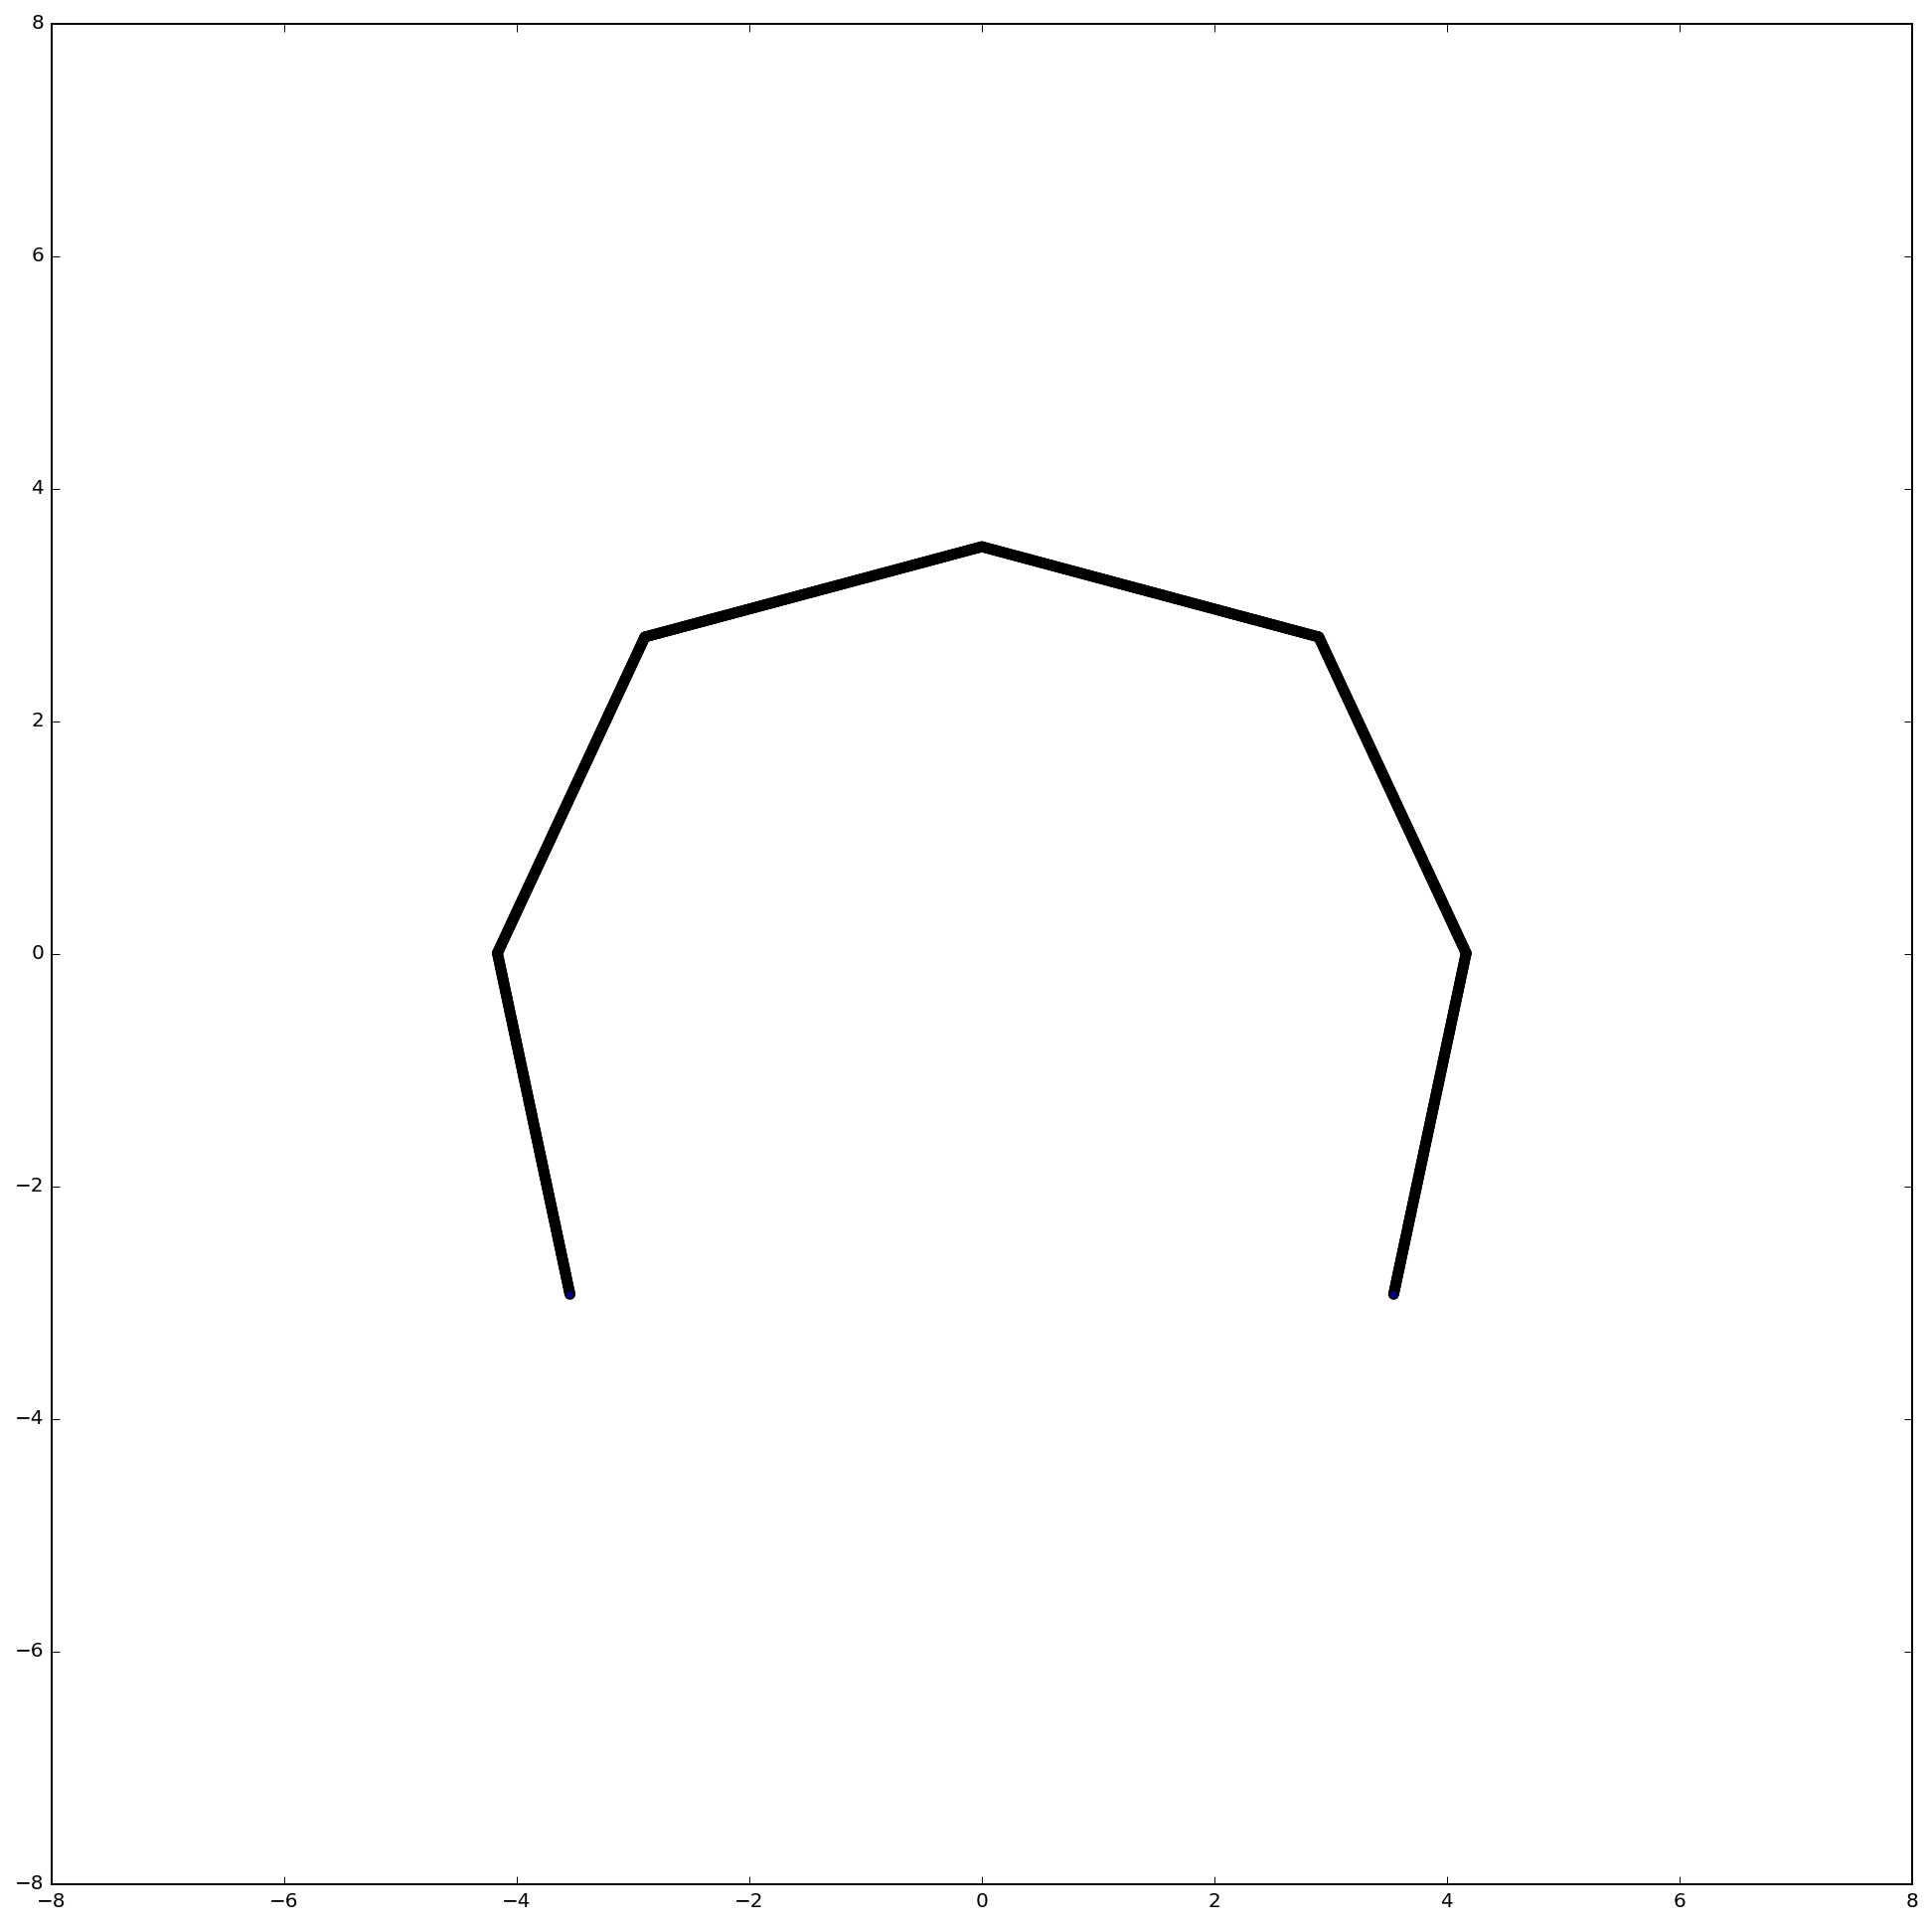

In [148]:
import elasticite as el
import numpy as np

e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()

def plot_structure(e):
    fig = plt.figure(figsize=(e.figsize, e.figsize))
    border = 0.0
    ax = fig.add_axes((border, border, 1.-2*border, 1.-2*border), axisbg='w')
    scat  = ax.scatter(e.particles[0,:], e.particles[1,:], c=e.particles[1,:])
    ax.set_xlim([-e.total_width, e.total_width])
    ax.set_ylim([-e.total_width, e.total_width])
    return fig, ax
fig, ax = plot_structure(e)
print(e.do_structure())

In [149]:
segments = e.structure_as_segments()
print(segments)

[[[0.0, 3.5], [0.0, 3.5]], [[-2.8977774788672059, 2.7235428646924382], [-2.8977774788672059, 2.7235428646924382]], [[-4.1656322640893029, 0.0046195035824883046], [-4.1656322640893029, 0.0046195035824883046]], [[0.0, 3.5], [0.0, 3.5]], [[2.897777478867205, 2.7235428646924378], [2.897777478867205, 2.7235428646924378]], [[4.1656322640893038, 0.0046195035824880826], [4.1656322640893038, 0.0046195035824880826]]]


(3, 3072)
(3, 6144)
(3, 12288)
(3, 24576)
(3, 49152)
(3, 98304)


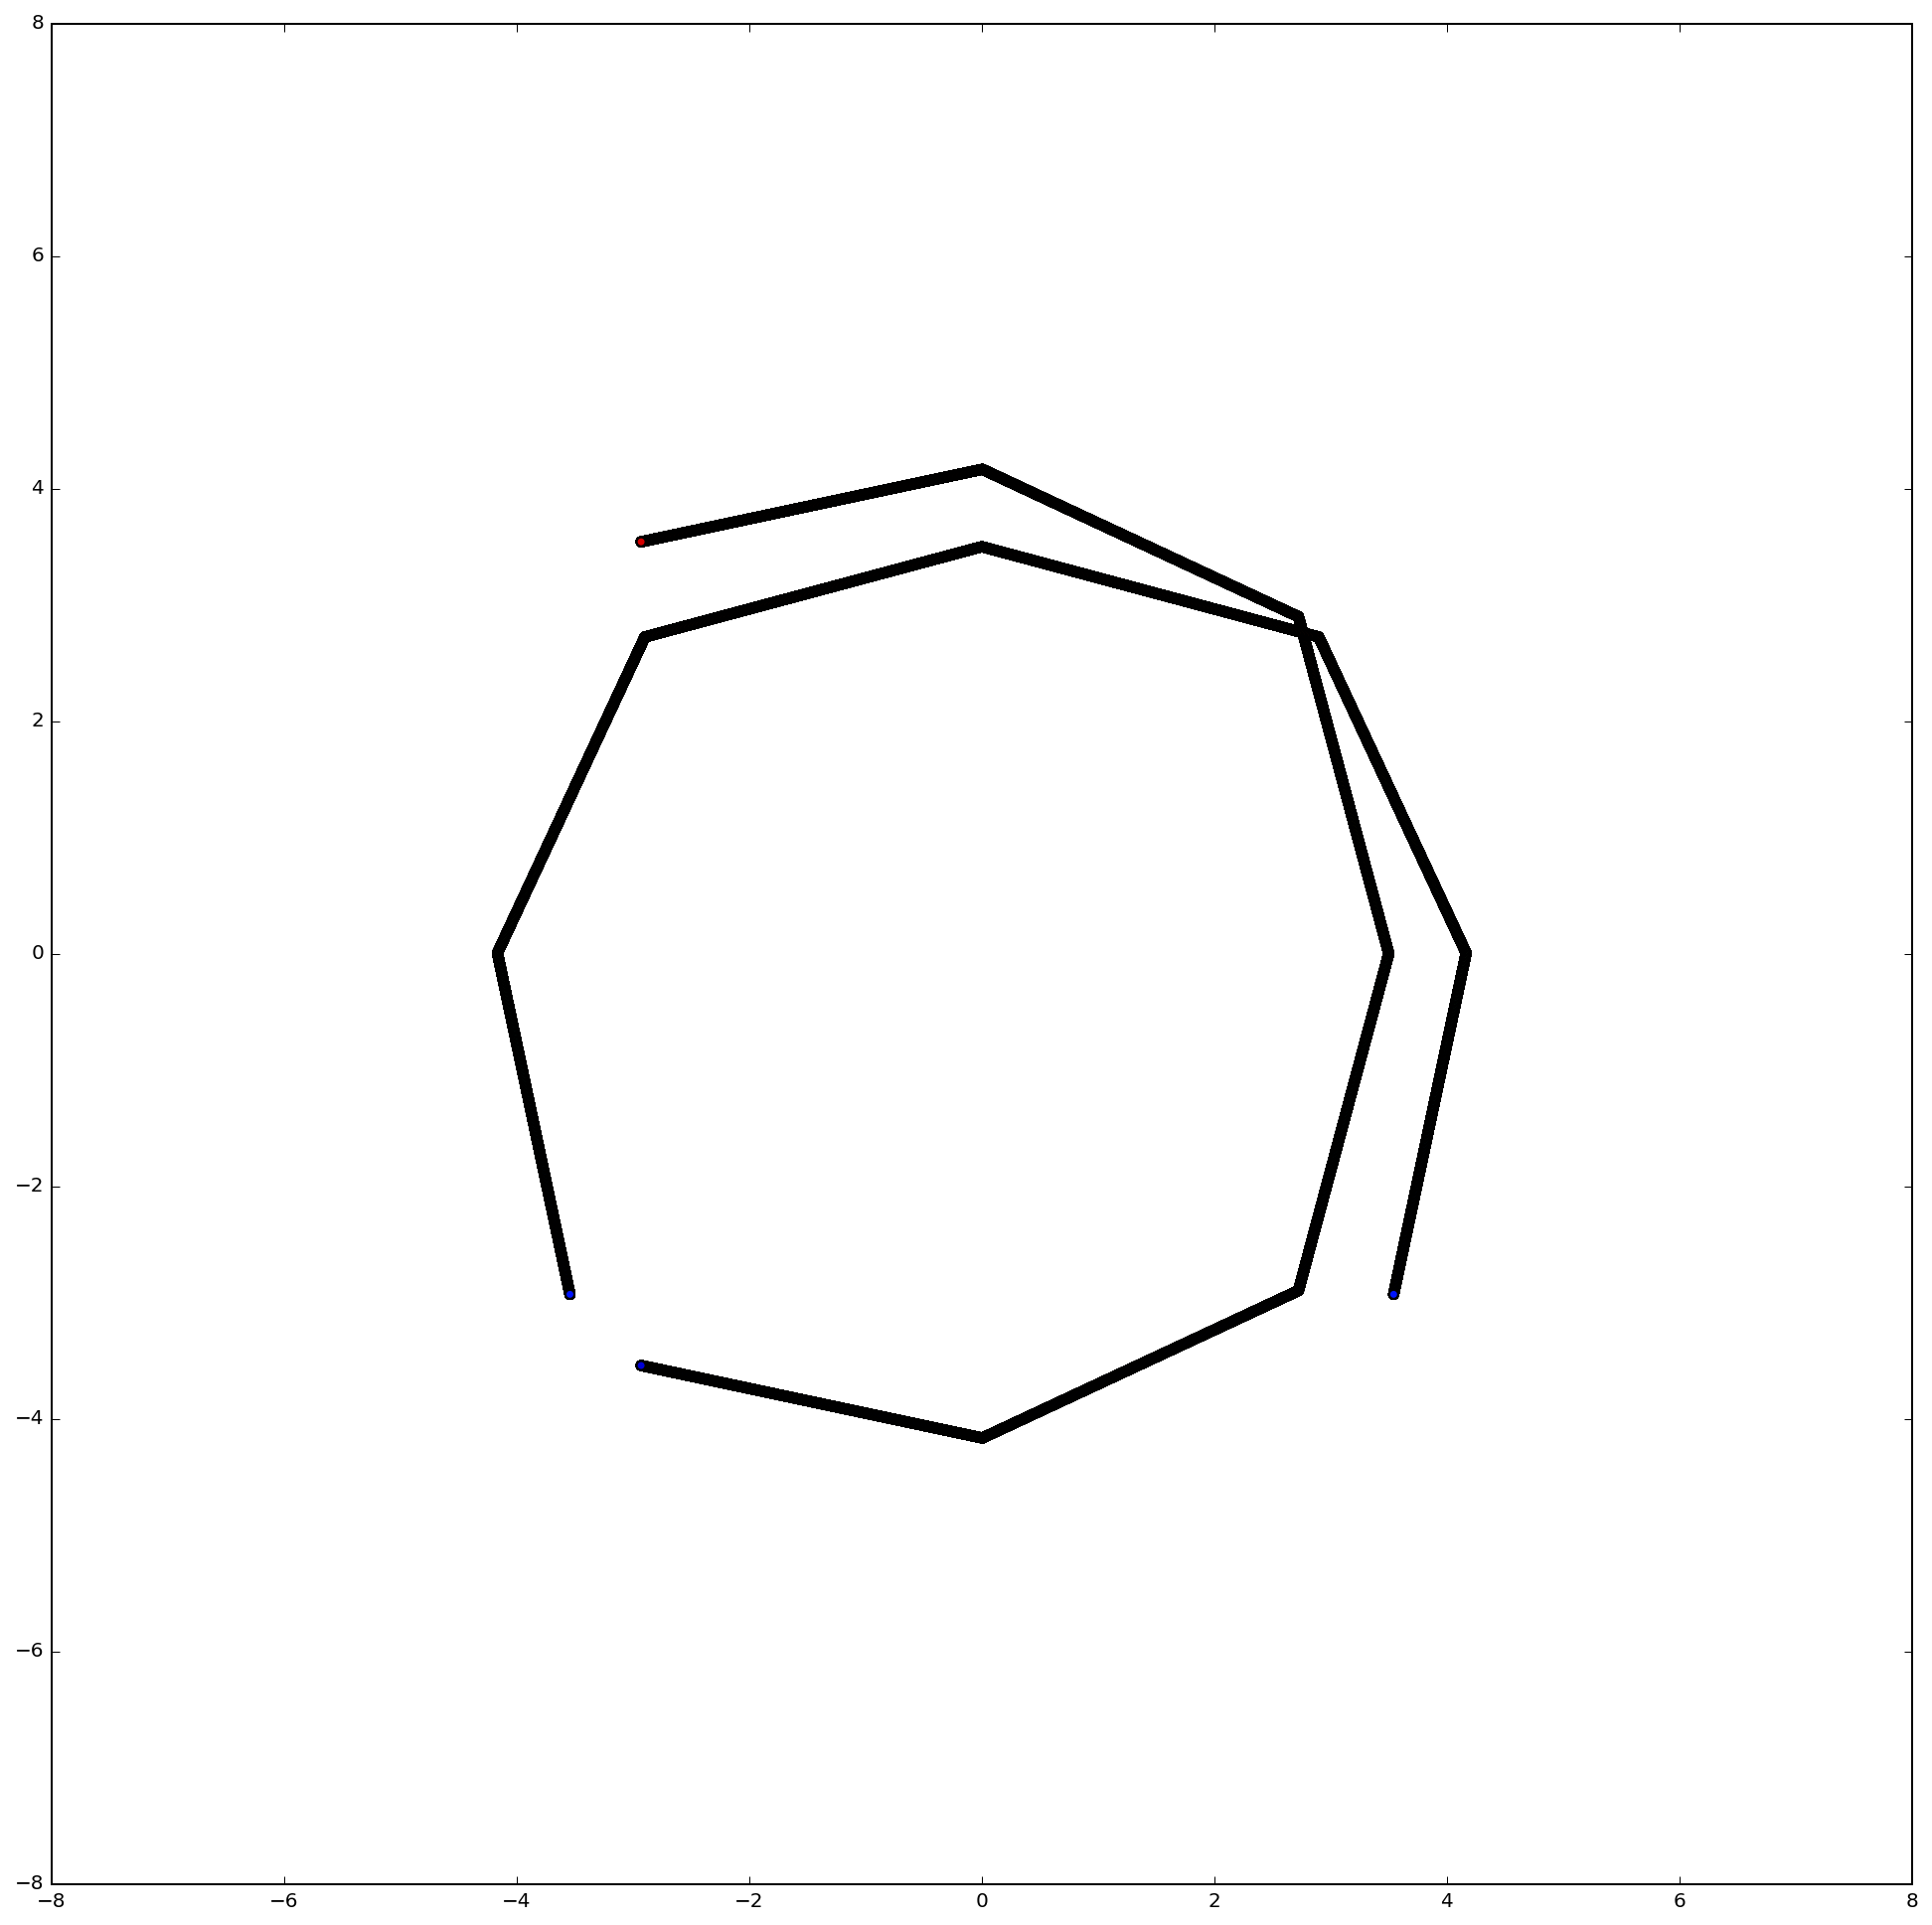

In [151]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
for segment in segments:
    e.particles = np.hstack((e.particles, mirror(e.particles, np.array(segment))))
    print(e.particles.shape)#, mirror(e.particles, np.array(segment))).shape)
    
fig, ax = plot_structure(e)

## git


In [114]:
!git s
!git add 2015-11-02\ élasticité\ expansion\ en\ miroir.ipynb

 M "2015-10-27 \303\251lasticit\303\251 expansion.ipynb"
 M "2015-11-02 \303\251lasticit\303\251 expansion en miroir.ipynb"
?? "../notes-Laurent/2015-10-22_\303\251lasticit\303\251 LAMES-Dynamique_pdf.pdf"
?? __temp__.mp4
?? __temp_ipython__.png
?? anim.gif
?? ../screenshot.png


In [115]:
!git commit -am' expansion - ok pour les formules du miroir'

[master bc4cca0]  expansion - ok pour les formules du miroir
 2 files changed, 854 insertions(+), 534 deletions(-)
 rewrite "posts/2015-10-27 \303\251lasticit\303\251 expansion.ipynb" (62%)


In [116]:
! git push



fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
